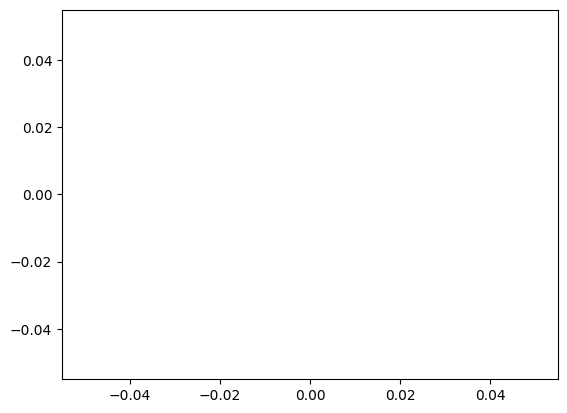

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from IPython.display import display, Markdown, Latex
from math import lcm

SMALL_SIZE = 14
MEDIUM_SIZE = 16
LARGE_SIZE = 18
HUGE_SIZE = 20

plt.plot()
plt.rcdefaults()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = MEDIUM_SIZE
plt.rcParams['axes.titlesize'] = LARGE_SIZE
plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE
plt.rcParams['figure.titlesize'] = LARGE_SIZE
plt.rcParams['figure.figsize'] = [7.2, 7.2]
plt.rcParams['figure.dpi'] = 60
plt.rcParams['figure.facecolor'] = (1.0, 1.0, 1.0, 0.0)
plt.plot()

import utils2 as u2
rng = np.random.default_rng(123)

In [2]:
TYPE = "PriceChangeProblem"
FILENAME = f"{TYPE}.csv"
data = []
xn = 13
for xunit in [1,5,10]:
    xint = 12*xunit
    for yint1 in np.arange(3*xunit, 13*xunit, xunit):
        for yint2 in np.arange(3*xunit, 13*xunit, xunit):
            if yint1!=yint2:
                I = lcm(xint, yint1, yint2)
                px1 = I/xint
                px2 = px1
                py1 = I/yint1
                py2 = I/yint2
                for x1 in np.arange(2*xunit, 11*xunit, xunit):
                    for x2 in np.arange(2*xunit, 11*xunit, xunit):
                        y1 = (I - px1*x1)/py1
                        y2 = (I - px2*x2)/py2
                        params = {'x1':x1,'px1':px1,'py1':py1,'x2':x2,'px2':px2,'py2':py2,'I':I,'xunit':xunit,'xn':xn}
                        problem = u2.load_problem(TYPE, params=params, rng=rng)
                        if problem.check_solution():
                            data.append( problem.params | problem.sol )
    yint = 12*xunit
    for xint1 in np.arange(3*xunit, 13*xunit, xunit):
        for xint2 in np.arange(3*xunit, 13*xunit, xunit):
            if xint1!=xint2:
                I = lcm(xint1, xint2, yint)
                px1 = I/xint1
                px2 = I/xint2
                py1 = I/yint
                py2 = I/yint
                for y1 in np.arange(2*xunit, 11*xunit, xunit):
                    for y2 in np.arange(2*xunit, 11*xunit, xunit):
                        x1 = (I - py1*y1)/px1
                        x2 = (I - py2*y2)/px2
                        params = {'x1':x1,'px1':px1,'py1':py1,'x2':x2,'px2':px2,'py2':py2,'I':I,'xunit':xunit,'xn':xn}
                        problem = u2.load_problem(TYPE, params=params, rng=rng)
                        if problem.check_solution():
                            data.append( problem.params | problem.sol )
data = pd.DataFrame.from_dict(data)
data.to_csv(FILENAME, header=True, index=False)
print(len(data))
data['comp_or_sub'].value_counts()

/Users/edward.kung/workspace/projects/CSUN-Econ-310/_workspace/utils2.py:178: RuntimeWarning: overflow encountered in exp
  a = 1/(1+np.exp(X[1]))


1368


comp_or_sub
substitutes    1056
neither         180
complements     132
Name: count, dtype: int64

In [3]:
TYPE = "PublicSchoolProblem"
FILENAME = f"{TYPE}.csv"
data = []
xn = 13
I = 1200
for xunit in [1,5,10]:
    for xint in np.arange(6,13)*xunit:
        px = I/xint
        for yint in np.arange(6,13)*xunit:
            py = I/yint
            for x_private in np.arange(2*xunit, xint-xunit, xunit):
                for x_public in np.arange(2*xunit, xint-xunit, xunit):
                    params = {'x_private':x_private, 'x_public':x_public, 'px':px, 'py':py, 'I':I, 'xunit':xunit, 'xn':xn}
                    problem = u2.load_problem(TYPE, params=params, rng=rng)
                    if problem.check_solution():
                        data.append( problem.params | problem.sol )
data = pd.DataFrame.from_dict(data)
data.to_csv(FILENAME, header=True, index=False)
print(len(data))

1245


In [4]:
foo = u2.load_problem(TYPE, params=dict(data.sample(1).iloc[0]))
display(Latex(foo.setup_list[0]['setup']))
foo.params | foo.sol

<IPython.core.display.Latex object>

{'x_private': 30,
 'x_public': 80,
 'px': 10.909090909090908,
 'py': 10.909090909090908,
 'I': 1200,
 'xunit': 10,
 'xn': 13,
 'y_private': 80.00000000000001,
 'U_private': 61.22329457998775,
 'U_public': 100.84950420390236,
 'choice': 'public',
 'xchoice': 80,
 'ychoice': 110.00000000000001}

In [5]:
np.inf

inf